In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git #SAM2
!mkdir checkpoints
!wget -P checkpoints https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-bblbl12r
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-bblbl12r
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘checkpoints’: File exists
--2025-05-19 14:21:16--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.161.170.55, 18.161.170.51, 18.161.170.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.161.170.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘checkpoints/sam_vit_h_4b8939.pth.2’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   133MB/s    in 25s     

2025-05-19 14:21:41 

In [9]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
image = Image.open("image.jpg")

# Convertir l'image en tableau numpy
image_np = np.array(image)

sam = sam_model_registry["vit_h"](checkpoint="checkpoints/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image(image_np)

In [7]:
input_point = np.array([[250, 220]])  # par ex : point sur le chat
input_label = np.array([1])  # 1 = objet (pas fond)

masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

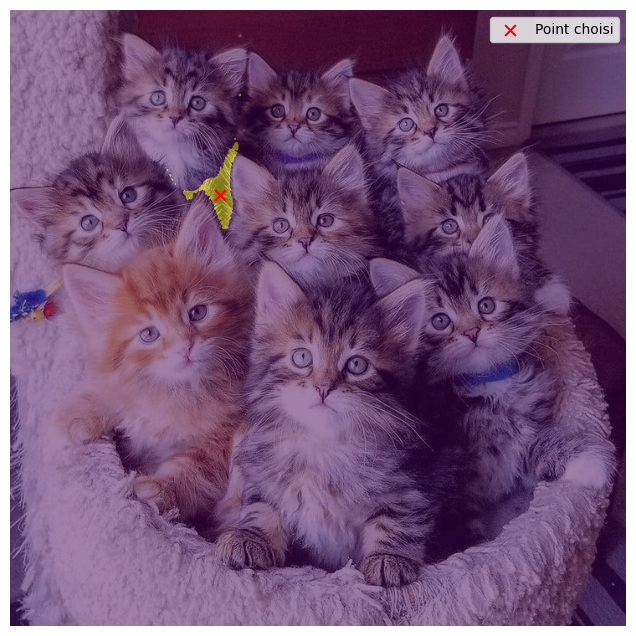

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(image_np)                 # Image de fond
plt.imshow(masks[0], alpha=0.5)      # Masque semi-transparent

plt.scatter([input_point[0][0]], [input_point[0][1]], color='red', s=60, marker='x', label='Point choisi')

plt.axis('off')
plt.legend()
plt.show()

In [15]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,         # Densité de points pour segmenter (augmente la qualité)
    pred_iou_thresh=0.88,       # Seulement les masques avec haute confiance
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100   # Évite les petits bruits
)
masks = mask_generator.generate(image_np)

KeyboardInterrupt: 

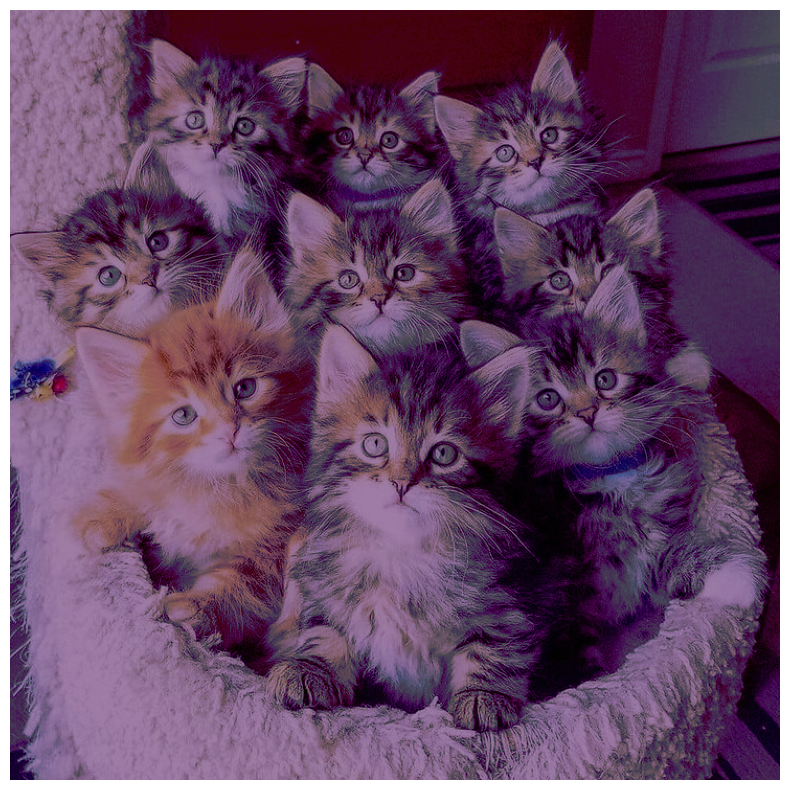

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(image_np)

for mask in masks:
    plt.imshow(mask["segmentation"], alpha=0.01)

plt.axis('off')
plt.show()